In [30]:
In this notebook, we build a simple convoluation neural network using tensorflow to classify Fashion-MNIST dataset. 
which is a dataset of Zalando's article images. The training set consists of 60k examples and test set consists of 10k examples. 
Each example is a 28x28 grayscale image, associated with a label from 10 classes as mentioned below.

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [ ]:
import tensorflow
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [31]:
# Load data

(xtrain,ytrain),(xtest,ytest) = keras.datasets.fashion_mnist.load_data()

In [6]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
xtrain.shape

(60000, 28, 28)

In [8]:
xtest.shape

(10000, 28, 28)

In [9]:
ytrain.shape

(60000,)

In [10]:
ytrain[0]

9

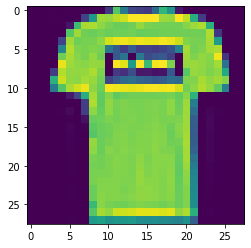

In [11]:
# show image
import matplotlib.pyplot as plt
plt.imshow(xtrain[1])

In [12]:
# feature scaling
#0 to 255 values the after i try to normalize.
#to converted 0 to 1 range values.
xtrain=xtrain/255
xtest=xtest/255


In [13]:
xtrain

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
xtest

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [15]:
# Build Neural Network model

model=Sequential()
model.add(Flatten(input_shape=(28,28))) #input layer
model.add(Dense(128,activation='relu')) #hidden layer
model.add(Dense(10,activation='softmax')) #output layer

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compail the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
#train the model
history=model.fit(xtrain,ytrain,batch_size=64,epochs=100,verbose=1,validation_split=0.2)
  

Epoch 1/100
750/750 [==============================] - 7s 8ms/step - loss: 0.5435 - accuracy: 0.8107 - val_loss: 0.4308 - val_accuracy: 0.8484
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4025 - accuracy: 0.8581 - val_loss: 0.3874 - val_accuracy: 0.8637
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3593 - accuracy: 0.8704 - val_loss: 0.3683 - val_accuracy: 0.8714
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.3321 - accuracy: 0.8804 - val_loss: 0.3474 - val_accuracy: 0.8783
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3121 - accuracy: 0.8879 - val_loss: 0.3435 - val_accuracy: 0.8742
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2946 - accuracy: 0.8915 - val_loss: 0.3310 - val_accuracy: 0.8805
Epoch 7/100
750/750 [==============================] - 3s 3ms/step - loss: 0.2820 - accuracy: 0.8967 - val_loss: 0.3331 - val_accuracy: 0.8793

In [19]:
#Test and Evaluate Neural Network Model
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.7608 - accuracy: 0.8832


[0.7608172297477722, 0.8831999897956848]

In [20]:
model.predict(xtest)

313/313 [==============================] - 1s 1ms/step


array([[4.8881655e-18, 4.2586973e-22, 4.4571217e-22, ..., 3.1900847e-11,
        2.6016369e-18, 9.9999994e-01],
       [1.1705755e-07, 4.3380099e-28, 9.9999982e-01, ..., 6.2646282e-29,
        3.3231760e-28, 1.8439674e-22],
       [1.2206145e-18, 9.9999994e-01, 9.1911897e-32, ..., 0.0000000e+00,
        2.4201526e-38, 0.0000000e+00],
       ...,
       [1.5960068e-18, 4.4263281e-25, 3.4132576e-18, ..., 1.9477839e-27,
        9.9999994e-01, 8.3683006e-37],
       [6.0247312e-20, 9.9999994e-01, 5.3165214e-28, ..., 3.4733954e-37,
        4.8843036e-27, 8.1043441e-21],
       [5.3626641e-16, 4.7001271e-18, 8.2364385e-17, ..., 1.0114450e-06,
        3.2090598e-12, 1.3637802e-10]], dtype=float32)

In [22]:
y_pro=model.predict(xtest) 

313/313 [==============================] - 1s 2ms/step


In [24]:
ypred=y_pro.argmax(axis=1)


In [25]:
#accuracy of the  model
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)


0.8832

check the model overfit or not

A figure is created showing line plots of the model loss on the train and test sets.

We can see that expected shape of it is goodfit model .

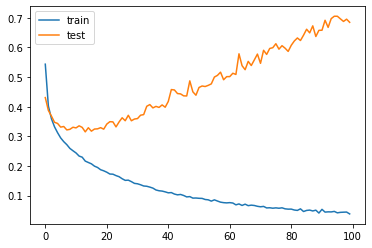

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

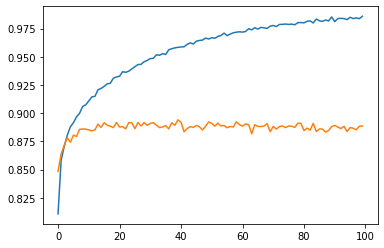

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

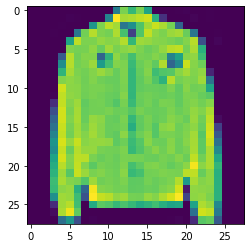

In [28]:
#show it is real img
plt.imshow(xtest[79])